https://github.com/douxiaoya83-oss/individual_project.git

## Data description

#### `players.csv`: 196 observations and 7 variables describing player characteristics.
+ `experience`, Character, experience level of each player, which includes `Beginner`, `Amateur`, `Regular`, `Pro`, and `Veteran`.
+ `subscribe`, Logical, wheather the player subscribe the game newsletter
+ `hashedEmail`, Character, recorded email addresses of players
+ `played_hours`, Double, total number of hours the player has spent playing games
+ `name`, Character, name of player
+ `gender`, Character, gender of player, eg. `Female`, `Male`, `Non-binary`
+ `Age`, Double, age of player

#### `sessions.csv`: 1536 observations and 5 variables describing gameplay sessions.
+ `hashedEmail`, Character, recorded email addresses of players
+ `start_time`, Character, local time when the session began
+ `end_time`, Character, local time when the session ended
+ `original_start_time`, Double, Unix-style timestamp when the session began
+ `original_end_time`, Double, Unix-style timestamp when the session ended

### Potential Issues: 
1. `Ages` has missing datas and outliers
2. The data type of `experience`, `gender` are character, which is not the correct as predictors


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


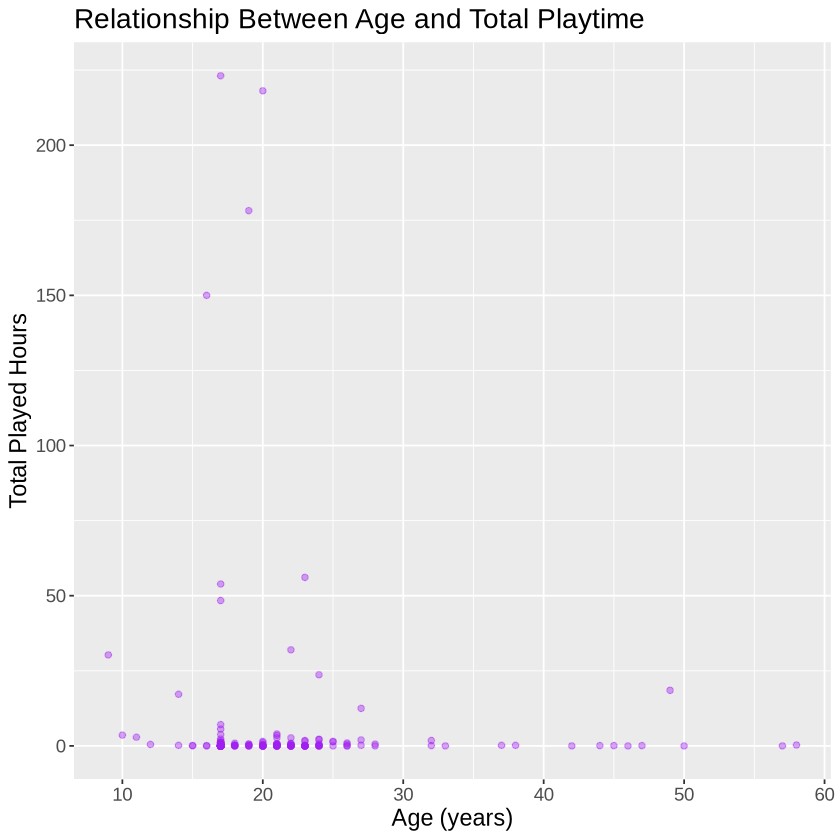